<img src="./logo_UTN.svg" align="right" width="200" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 11

#### Ana Nuñez



# Consigna

Síntesis de funciones de excitación

1) Sea la función:

    $ Z(s) = \frac{(s2+3)(s2+1)}{s(s2+2)} $

    Se pide hallar la topología circuital y los valores de los componentes para:

    a) Síntesis de Z(s) mediante el método de Foster en su versión  "paralelo" o "derivación".

    b) Idem a) mediante Cauer 1 y 2.

2) Sea 

    $ Y(s) = \frac{3s(s2+7/3)}{(s2+2)(s2+5)} $

    Obtenga los valores de los componentes de la siguiente red sabiendo que L2 y C2 resuenan a 1 r/s.

    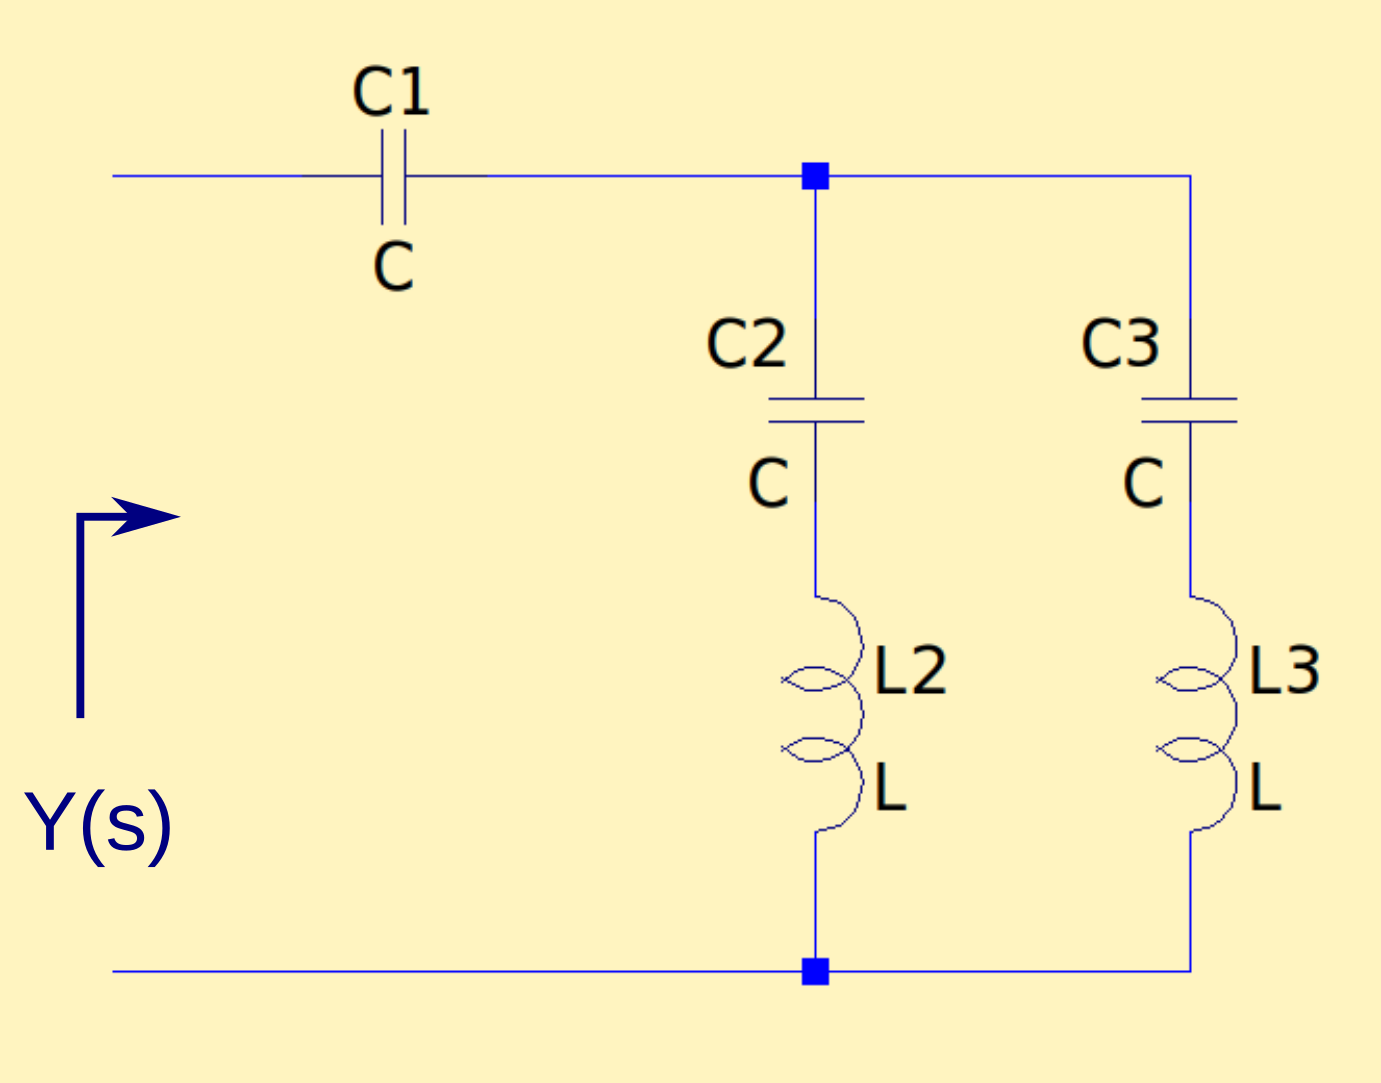

# Desarrollo analítico


In [2]:

from IPython.display import IFrame
IFrame("./TS9.pdf", width=1000, height=1000)

# Simulacion numérica

### Foster en derivación

In [1]:
import sympy as sp

# Funciones de PyTC2

from pytc2.sintesis_dipolo import foster, remover_polo_dc, remover_polo_infinito
from pytc2.dibujar import dibujar_foster_serie, dibujar_foster_derivacion
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from pytc2.remociones import remover_polo_jw, remover_valor_en_infinito

### ---- Variable Compleja

s = sp.symbols('s ', complex=True)

In [5]:
# Resolución simbólica
# ------- Función excitación (Red no disipativa) ------

Y11 = (3*s * (s**2 + 7/3)) / ((s**2 + 2) * (s**2 + 5))
Y11 = sp.nsimplify(Y11)

print_latex(a_equal_b_latex_s('Y_{11}(s)', Y11))

<IPython.core.display.Math object>

In [6]:
# ------- Remoción parcial de polo en DC -------

Z2, Z1 = remover_polo_dc(1/Y11, omega_zero = 1)

print_latex(a_equal_b_latex_s('Z1(s)', Z1))
print_latex(a_equal_b_latex_s('Z2(s)', Z2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# ------ Remoción completa de polo sobre eje jw = 1 ------

Y4, k1, L1, C2 = remover_polo_jw(1/Z2, omega = 1, isImpedance = False)

print_latex(a_equal_b_latex_s('k0', k1))
print_latex(a_equal_b_latex_s('Y_4(s)', Y4))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
# ------ Remoción completa de polo sobre eje jw = 0 ------

Z6, Z5 = remover_polo_dc(1/Y4)

print_latex(a_equal_b_latex_s('Z5(s)', Z5))
print_latex(a_equal_b_latex_s('Z6(s)', Z6))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Simulación circuital

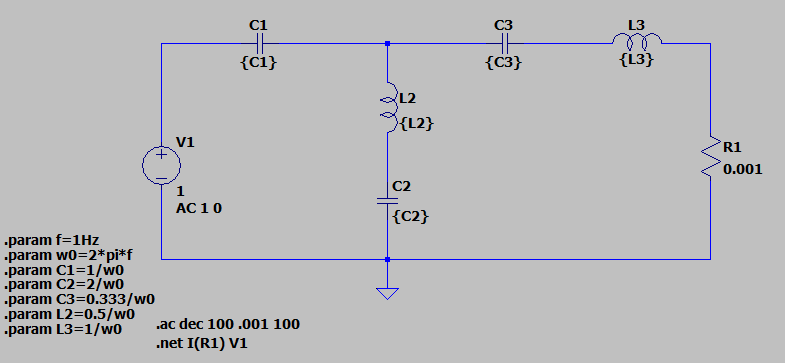

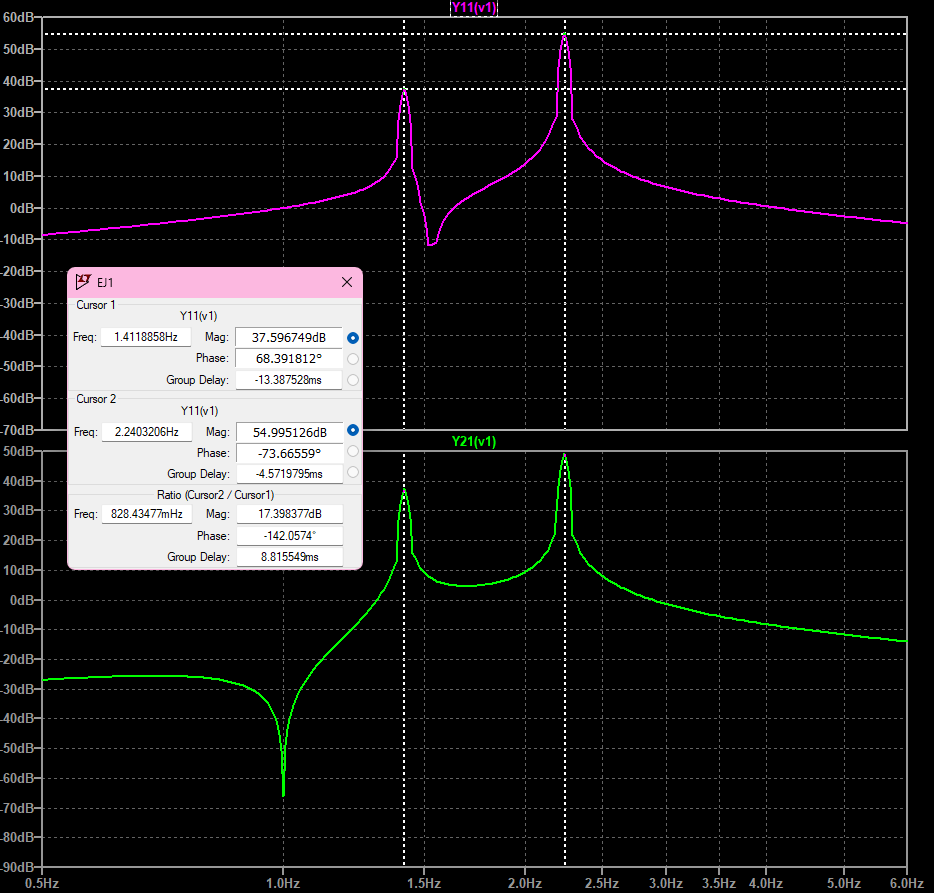

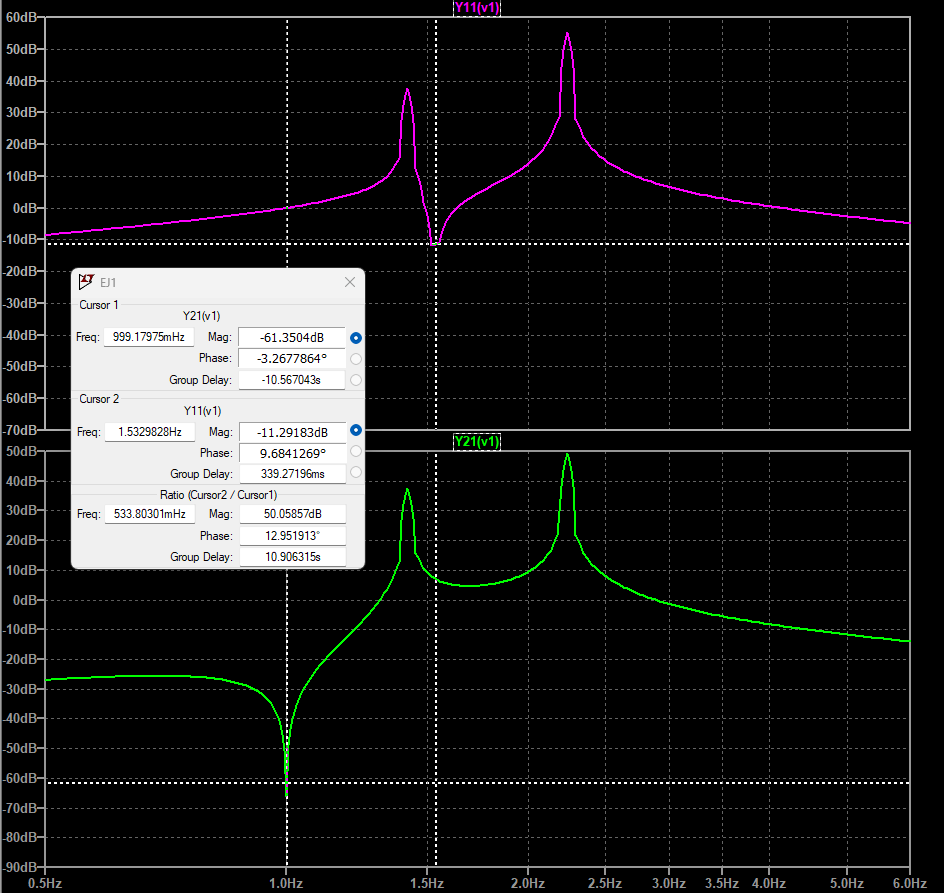




# Punto 2

In [26]:
import sympy as sp

# Funciones de PyTC2

from pytc2.remociones import remover_polo_dc, remover_polo_jw
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_derivacion, dibujar_tanque_RC_serie,  dibujar_espacio_derivacion, Capacitor, Resistor, ResistorIEC
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown

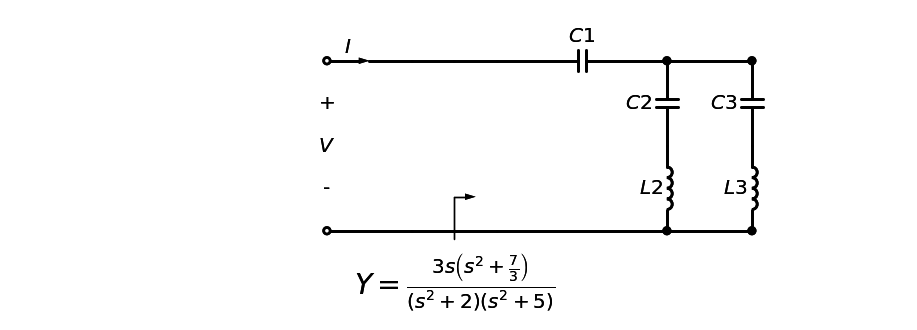

In [28]:
# Resolución simbólica
s = sp.symbols('s ', complex=True)

# Sea la siguiente función de excitación
Y = 3*s*(s**2+sp.Rational(7,3))/(s**2+2)/(s**2+5)

# Red ejemplo 1
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                 'Y',  
                 Y, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Capacitor, 'C1')

d = dibujar_tanque_derivacion(d, 'L2', 'C2')

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_derivacion(d, 'L3', 'C3')

display(d)

In [31]:
print_subtitle('Admitancia de entrada a la red')

print_latex(a_equal_b_latex_s('Y(s)', Y))

# calculamos polos y ceros de Y(s)
num, den = Y.as_numer_denom()


#### Admitancia de entrada a la red

<IPython.core.display.Math object>

In [32]:
# Restricción circuital: L2*C2 = 1 r/s
# remoción parcial en DC de 1/YY

omega_L2C2 = 1

Z2, Zc1 = remover_polo_dc(1/Y, omega_zero = omega_L2C2 )

# Yc1 es la admitancia removida
# extraigo C1
C1 = 1/(s*Zc1)

print_latex(a_equal_b_latex_s('Z_1(s) = \\frac{k^p_0}{s}', Zc1))
print_latex(a_equal_b_latex_s('Z_2(s)', Z2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [33]:
Y4, Yt2, L2, C2 = remover_polo_jw(1/Z2, isImpedance = False, omega = omega_L2C2 )

print_latex(a_equal_b_latex_s('Y_3(s)', Yt2))
print_latex(a_equal_b_latex_s('Y_4(s)', Y4))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [34]:
# quedaría solo un tanque en Y4, no especifico omega.
Y6, Yt3, L3, C3 = remover_polo_jw(Y4, isImpedance = False)

print_latex(a_equal_b_latex_s('Y_5(s)', Yt3))
print_latex(a_equal_b_latex_s('Y_6(s)', Y6))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

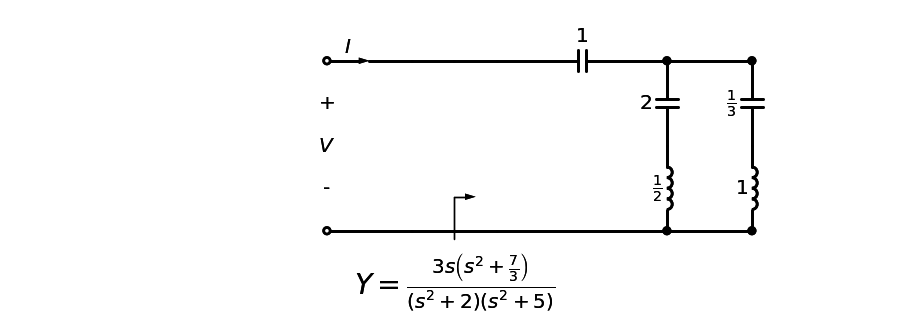

In [36]:
# Dibujamos la red resultante:

d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                 'Y',  
                 Y, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Capacitor, C1)

d = dibujar_tanque_derivacion(d, L2, C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_derivacion(d, L3, C3)

display(d)